In [2]:
from pytorch_libraries.model_NeuralStyleTransfer import *
from IPython.display import clear_output

from pylab import *
%matplotlib inline
plt.rc("figure",facecolor="w",figsize=(6,4))

In [3]:
# Image preprocessing
imH,imW = 100,120
# For normalization, see https://github.com/pytorch/vision#models
transform = transforms.Compose([transforms.Resize((imH,imW)),
                                transforms.ToTensor()])

content   = Variable(image_loader('../../data/images/chicago2.jpg', transform ))
style     = Variable(image_loader('../../data/images/wave.jpg', transform ))
parameter = Variable(content.data.clone(), requires_grad=True)

vgg     = VGGNet().cuda()

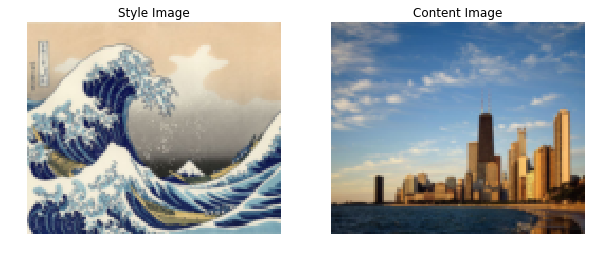

In [7]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
tensor_shower(style.data,imH,imW,title = 'Style Image')

plt.subplot(1,2,2)
tensor_shower(content.data,imH,imW,title = 'Content Image')

In [3]:
optimizer = torch.optim.LBFGS([parameter])
STYLE_WEIGHT  = 100.0

In [4]:
def closure():
    optimizer.zero_grad()
    
    # correct the values of updated input image
    f_parameter = vgg(parameter)
    f_content   = vgg(content)
    f_style     = vgg(style)
    
    loss_style   = 0
    loss_content = 0
    
    for l, fp in enumerate(f_parameter):
        fc = f_content[l]
        fs = f_style[l]
            
        # Compute content loss (target and content image)
        if l == 3:
            loss_content += torch.mean((fp - fc)**2)

        # Reshape conv features
        _, c, h, w = fp.size()
        fp = fp.view(c, h * w)
        fs = fs.view(c, h * w)
        # Compute gram matrix  
        gram_p = torch.mm(fp, fp.t())
        gram_s = torch.mm(fs, fs.t())
        # Compute style loss (target and style image)
        loss_style += torch.mean((gram_p - gram_s)**2) / (c * h * w) 
        
    loss = loss_content + loss_style * STYLE_WEIGHT
    loss.backward()
    return loss

In [6]:
for i in range(10):
    optimizer.step(closure)
    
    denorm = transforms.Normalize((-2.12, -2.04, -1.80), (4.37, 4.46, 4.44))
    img    = denorm(parameter.clone().cpu().squeeze().data).clamp_(0, 1)
    torchvision.utils.save_image(img, '../../plot/nst/outputs{}.png'.format(i))

NameError: name 'plt' is not defined

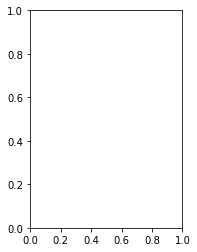

In [5]:
 models.vgg19(pretrained=True).features

Sequential (
  (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (1): ReLU (inplace)
  (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (3): ReLU (inplace)
  (4): MaxPool2d (size=(2, 2), stride=(2, 2), dilation=(1, 1))
  (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (6): ReLU (inplace)
  (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (8): ReLU (inplace)
  (9): MaxPool2d (size=(2, 2), stride=(2, 2), dilation=(1, 1))
  (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (11): ReLU (inplace)
  (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (13): ReLU (inplace)
  (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (15): ReLU (inplace)
  (16): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (17): ReLU (inplace)
  (18): MaxPool2d (size=(2, 2), stride=(2, 2), dilation=(1, 1))
  (19): Conv2d(256,